In [3]:
!pip install pystan

  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 3.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 1.9 MB/s eta 0:00:00m eta 0:00:010:01:01
  Preparing metadata (setup.py) ... done
  Using cached crashtest-0.3.1-py3-none-any.whl (7.0 kB)
  Using cached pastel-0.2.1-py2.py3-none-any.whl (6.0 kB)
  Using cached pylev-1.4.0-py2.py3-none-any.whl (6.1 kB)
  Using cached marshmallow-3.20.1-py3-none-any.whl (49 kB)
  Using cached webargs-8.3.0-py3-none-any.whl (31 kB)
  Created wheel for pysimdjson: filename=pysimdjson-5.0.2-cp311-cp311-linux_x86_64.whl size=202470 sha256=c8b9d29cc9db0c0b209a840952e48f9989ec802ac8d251f658acb199386bf2cf
  Stored in directory: /home/sequi/.cache/pip/wheels/0a/79/aa/f8229f0fd5e28284366dccf2649ed344588048909c6c2416f9
Successfully built pysimdjson


In [1]:
import matplotlib.pyplot as plt

In [2]:
import stan

In [3]:
# this is a work around found at 
# https://stackoverflow.com/questions/56154176/runtimeerror-asyncio-run-cannot-be-called-from-a-running-event-loop-in-spyd
import nest_asyncio
nest_asyncio.apply()

In [4]:
schools_code = """
data {
  int<lower=0> J;         // number of schools
  real y[J];              // estimated treatment effects
  real<lower=0> sigma[J]; // standard error of effect estimates
}
parameters {
  real mu;                // population treatment effect
  real<lower=0> tau;      // standard deviation in treatment effects
  vector[J] eta;          // unscaled deviation from mu by school
}
transformed parameters {
  vector[J] theta = mu + tau * eta;        // school treatment effects
}
model {
  target += normal_lpdf(eta | 0, 1);       // prior log-density
  target += normal_lpdf(y | theta, sigma); // log-likelihood
}
"""

In [46]:
naif_schools_code = """
data {
  int<lower=0> J;         // number of schools
  real y[J];              // estimated treatment effects
  real<lower=0> sigma[J]; // standard error of effect estimates
  }
  
parameters {
  real mu;                // population treatment effect
  real<lower=0> tau;      // standard deviation in treatment effects
  vector[J] eta;          // unscaled deviation from mu by school
}

transformed parameters {
  vector[J] theta = mu + tau * eta;        // school treatment effects
}

model {
  tau ~ normal(10,10);     // just put something that makes sense to you, it ends up being stable regardless of this choice
  mu ~ normal(0,10);

  for (i in 1:J)     
     {
     eta[i] ~ normal(0,1);     
     target += normal_lpdf(y[i] | theta[i], sigma[i] );
     }  
  
}

"""

In [18]:
schools_data = {"J": 8,
                "y": [28,  8, -3,  7, -1,  1, 18, 12],
                "sigma": [15, 10, 16, 11,  9, 11, 10, 18]}

## Original way

In [11]:
posterior = stan.build(schools_code, data=schools_data, random_seed=1)

Building: 0.1s
Building: 0.2s
Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s
Building: 2.4s
Building: 2.5s
Building: 2.6s
Building: 2.7s
Building: 2.8s
Building: 3.0s
Building: 3.1s
Building: 3.2s
Building: 3.3s
Building: 3.4s
Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.8s
Building: 3.9s
Building: 4.0s
Building: 4.1s
Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.5s
Building: 4.6s
Building: 4.7s
Building: 4.8s
Building: 4.9s
Building: 5.0s
Building: 5.1s
Building: 5.2s
Building: 5.3s
Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.8s
Building: 5.9s
Building: 6.0s
Building: 6.1s
Building: 6.2s
Building: 6.3s
Building: 6.4s
Building: 6.5s
Building: 6.6s
Building: 6.7s
Building: 

/home/sequi/.cache/httpstan/4.10.1/models/pehvu64j/model_pehvu64j.cpp: In constructor 'model_pehvu64j_namespace::model_pehvu64j::model_pehvu64j(stan::io::var_context&, unsigned int, std::ostream*)':
/home/sequi/.cache/httpstan/4.10.1/models/pehvu64j/model_pehvu64j.cpp:46:11: warning: variable 'pos__' set but not used [-Wunused-but-set-variable]
   46 |       int pos__ = std::numeric_limits<int>::min();
      |           ^~~~~
In file included from /home/sequi/miniconda3/envs/pymc_env/lib/python3.11/site-packages/httpstan/include/stan/math/prim/fun.hpp:124,
                 from /home/sequi/miniconda3/envs/pymc_env/lib/python3.11/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7,
                 from /home/sequi/miniconda3/envs/pymc_env/lib/python3.11/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9,
                 from /home/sequi/miniconda3/envs/pymc_env/lib/python3.11/site-packages/httpstan/include/stan/math/rev/fun.hpp:55,
                 from /h

Building: 7.5s
Building: 7.6s
Building: 7.7s
Building: 7.9s


/home/sequi/.cache/httpstan/4.10.1/models/pehvu64j/model_pehvu64j.cpp: In instantiation of 'void model_pehvu64j_namespace::model_pehvu64j::unconstrain_array_impl(const VecVar&, const VecI&, VecVar&, std::ostream*) const [with VecVar = std::vector<double, std::allocator<double> >; VecI = std::vector<int>; stan::require_vector_t<T_y>* <anonymous> = 0; stan::require_vector_like_vt<std::is_integral, VecI>* <anonymous> = 0; std::ostream = std::basic_ostream<char>]':
/home/sequi/.cache/httpstan/4.10.1/models/pehvu64j/model_pehvu64j.cpp:432:27:   required from here
/home/sequi/.cache/httpstan/4.10.1/models/pehvu64j/model_pehvu64j.cpp:222:11: warning: variable 'pos__' set but not used [-Wunused-but-set-variable]
  222 |       int pos__ = std::numeric_limits<int>::min();
      |           ^~~~~
/home/sequi/.cache/httpstan/4.10.1/models/pehvu64j/model_pehvu64j.cpp: In instantiation of 'void model_pehvu64j_namespace::model_pehvu64j::unconstrain_array_impl(const VecVar&, const VecI&, VecVar&, std:

Building: 8.0s
Building: 8.1s
Building: 8.2s
Building: 8.3s
Building: 8.4s
Building: 8.5s
Building: 8.6s
Building: 8.7s
Building: 8.8s
Building: 8.9s
Building: 9.0s
Building: 9.1s
Building: 9.2s
Building: 9.3s
Building: 9.4s
Building: 9.5s
Building: 9.6s
Building: 9.7s
Building: 9.8s
Building: 9.9s
Building: 10.0s
Building: 10.1s
Building: 10.2s
Building: 10.3s
Building: 10.4s
Building: 10.5s
Building: 10.6s
Building: 10.7s
Building: 10.8s
Building: 10.9s
Building: 11.0s
Building: 11.1s
Building: 11.2s
Building: 11.3s
Building: 11.4s
Building: 11.5s
Building: 11.6s
Building: 11.7s
Building: 11.8s
Building: 11.9s
Building: 12.0s
Building: 12.1s
Building: 12.2s
Building: 12.3s
Building: 12.4s
Building: 12.5s
Building: 12.6s
Building: 12.8s
Building: 12.9s
Building: 13.0s
Building: 13.1s
Building: 13.2s
Building: 13.3s
Building: 13.4s
Building: 13.5s
Building: 13.6s
Building: 13.7s
Building: 13.8s
Building: 13.9s
Building: 14.0s
Building: 14.1s
Building: 14.2s
Building: 14.3s
Building: 14

Building: 15.8s, done.
Messages from stanc:
Warning in '/tmp/httpstan_c0i5v2ho/model_pehvu64j.stan', line 4, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan_c0i5v2ho/model_pehvu64j.stan', line 5, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


In [12]:
fit = posterior.sample(num_chains=4, num_samples=1000)
eta = fit["eta"]  # array with shape (8, 4000)
df = fit.to_frame()  # pandas `DataFrame, requires pandas

Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 1.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.14 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.12 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.14 seconds.
  Adjust your expectations accordingly!


In [13]:
df

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu,tau,eta.1,...,eta.7,eta.8,theta.1,theta.2,theta.3,theta.4,theta.5,theta.6,theta.7,theta.8
draws,,,,,,,,,,,,,,,,,,,,,
0,-41.434797,0.995804,0.329328,4.0,15.0,0.0,49.613906,1.411805,3.712575,-0.842512,...,0.060928,0.198949,-1.716083,7.647921,8.584553,0.118586,0.255418,4.484776,1.638006,2.150418
1,-40.351307,0.960118,0.362729,3.0,7.0,0.0,43.888786,5.565448,5.241893,1.394502,...,1.477957,-0.457912,12.875275,8.713343,13.010387,12.390397,11.624891,6.152977,13.312742,3.165120
2,-38.787739,0.707885,0.339015,4.0,15.0,0.0,42.791248,9.089039,4.088504,1.725548,...,-0.800113,0.631965,16.143950,10.216015,9.100176,9.355503,13.088015,10.178043,5.817775,11.672828
3,-38.070688,0.993421,0.276670,4.0,15.0,0.0,41.100882,-3.252739,15.142525,1.790945,...,1.302802,0.271314,23.866685,-4.558579,5.296715,15.118712,-13.721916,1.606133,16.474977,0.855648
4,-39.943404,0.976922,0.329328,3.0,15.0,0.0,49.458689,0.988765,8.718704,2.116322,...,0.570918,0.800307,19.440349,9.779775,-17.787455,6.800586,3.661638,-2.470068,5.966430,7.966407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-38.938803,0.804256,0.276670,4.0,15.0,0.0,42.685992,3.600862,7.030774,0.308411,...,-0.994636,0.220432,5.769229,12.568509,3.097115,-1.263883,6.676914,6.571913,-3.392196,5.150672
3996,-40.248194,0.993653,0.329328,4.0,15.0,0.0,46.562869,-1.210811,2.353864,-0.001527,...,0.111574,0.763645,-1.214406,-2.317131,-0.754548,-4.186838,-0.233024,-2.351499,-0.948181,0.586705
3997,-41.561686,0.965625,0.362729,3.0,7.0,0.0,46.382168,4.097240,2.958960,-0.915341,...,-1.589421,-1.238984,1.388784,4.723689,6.405831,3.501403,1.671126,-0.096523,-0.605793,0.431135


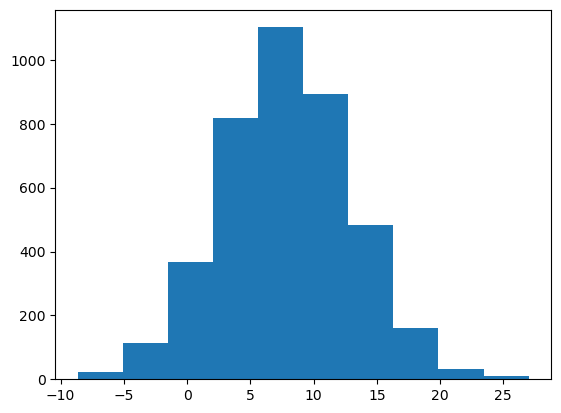

In [14]:
plt.hist(df['mu'])
plt.show()

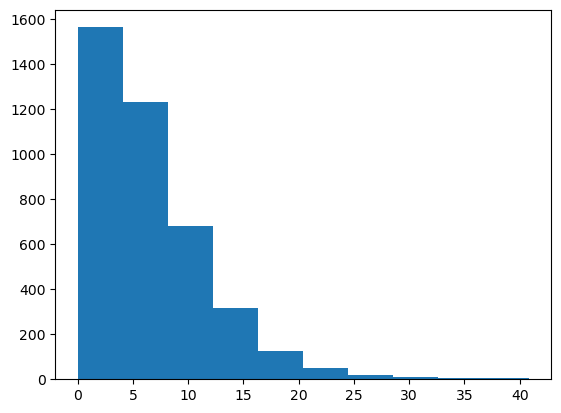

In [15]:
plt.hist(df['tau'])
plt.show()

In [16]:
list(df)

['lp__',
 'accept_stat__',
 'stepsize__',
 'treedepth__',
 'n_leapfrog__',
 'divergent__',
 'energy__',
 'mu',
 'tau',
 'eta.1',
 'eta.2',
 'eta.3',
 'eta.4',
 'eta.5',
 'eta.6',
 'eta.7',
 'eta.8',
 'theta.1',
 'theta.2',
 'theta.3',
 'theta.4',
 'theta.5',
 'theta.6',
 'theta.7',
 'theta.8']

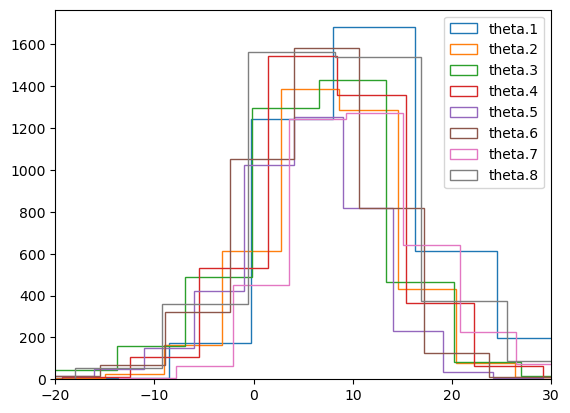

In [17]:
for name in list(df)[-8:]:
    plt.hist(df[name], histtype='step',label=name)
plt.xlim(-20,30)
plt.legend()
plt.show()

## more naif

In [48]:
posterior = stan.build(naif_schools_code, data=schools_data, random_seed=1)

Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_izxiysa2/model_l4xlcjvi.stan', line 4, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan_izxiysa2/model_l4xlcjvi.stan', line 5, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc


In [26]:
fit = posterior.sample(num_chains=4, num_samples=1000)

Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 2.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.24 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.18 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.17 seconds.
  Adjust your expectations accordingly!


In [43]:
#eta = fit["eta"]  # array with shape (8, 4000)
df = fit.to_frame()  # pandas `DataFrame, requires pandas

In [44]:
df

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu,tau,eta.1,...,eta.7,eta.8,theta.1,theta.2,theta.3,theta.4,theta.5,theta.6,theta.7,theta.8
draws,,,,,,,,,,,,,,,,,,,,,
0,-32.229409,0.918496,0.362645,3.0,7.0,0.0,36.575545,12.564571,5.623657,1.090005,...,0.690018,0.364845,18.694383,9.372003,2.834603,16.561173,9.960130,17.199284,16.444995,14.616333
1,-30.852151,0.996134,0.316842,3.0,15.0,0.0,37.271668,3.349463,9.342686,0.507695,...,0.959962,-0.155086,8.092700,15.162377,-5.007007,-4.388964,10.724680,8.657681,12.318083,1.900545
2,-33.257774,0.956102,0.397471,3.0,15.0,0.0,38.487899,9.024796,1.763361,1.110274,...,0.939006,-0.914482,10.982609,9.142643,7.295821,10.936967,10.242820,10.901254,10.680603,7.412234
3,-35.779075,0.978664,0.293562,3.0,7.0,0.0,37.810605,12.414282,4.640509,-0.258587,...,1.755371,0.350544,11.214307,13.067955,11.540326,12.172715,5.419205,23.154794,20.560097,14.040983
4,-35.250778,0.925535,0.362645,4.0,15.0,0.0,41.652675,6.261016,0.620688,-1.603998,...,0.425062,-0.791429,5.265434,6.765571,7.123525,5.578836,6.269789,5.508914,6.524846,5.769786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-31.276250,0.985500,0.293562,4.0,15.0,0.0,35.805368,12.431593,9.281325,0.729263,...,0.010838,0.930587,19.200123,22.316865,-0.351493,3.504601,2.976127,2.546904,12.532188,21.068674
3996,-30.185004,0.922263,0.362645,3.0,15.0,0.0,35.428346,5.368362,4.870227,0.050781,...,1.167875,-0.821355,5.615677,9.890608,-0.705280,3.819933,3.145608,5.469694,11.056177,1.368175
3997,-34.157996,0.899317,0.316842,4.0,15.0,0.0,40.857524,-0.871115,4.843127,-1.580720,...,0.398744,1.464209,-8.526745,-4.216827,-0.457939,0.146796,-0.028262,2.059976,1.060054,6.220234


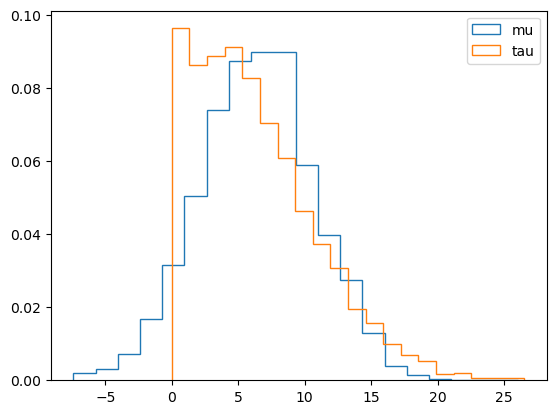

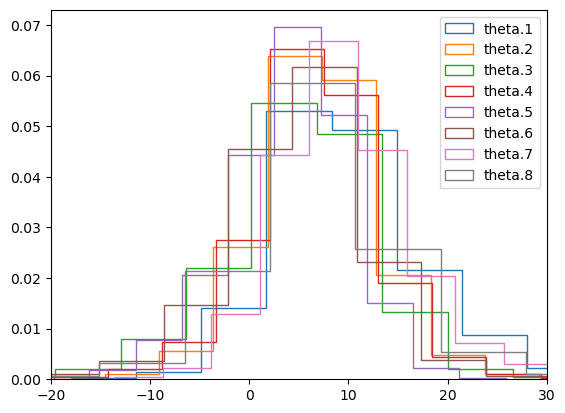

In [49]:
for var in ['mu', 'tau']:
    plt.hist(df[var], bins=20, histtype='step', density=1, label=var)
plt.legend()
plt.show()

for var in ['theta.1','theta.2','theta.3','theta.4','theta.5','theta.6','theta.7','theta.8']:
    plt.hist(df[var], bins=10, histtype='step', density=1, label=var)
plt.xlim(-20,30)
plt.legend()
plt.show()